In [1]:
import os
import numpy
import pandas
import pandasql
from matplotlib import pyplot

In [2]:
d = './data/'
listed = {}
columns = ['time', 'action', 'order_id', 'size', 'price', 'direction']
for file in os.listdir(d):
    if '.csv' in file:
        g = '{0}{1}'.format(d, file)
        data = pandas.read_csv(g, header=None, names=columns)
        name = file[:file.index('.csv')]
        listed[name] = data

In [20]:
data = listed['AMZN_message_1']
data

,time,action,order_id,size,price,direction
0,34200.017460,5,0,1,2238200,-1
1,34200.189608,1,11885113,21,2238100,1
2,34200.190226,4,11885113,21,2238100,1
3,34200.190226,4,11534792,26,2237500,1
4,34200.372780,5,0,100,2238400,-1
...,...,...,...,...,...,...
57510,57599.545828,4,282917222,9,2205100,1
57511,57599.545828,4,286916542,51,2205100,1
57512,57599.903989,3,287142900,100,2206200,-1
57513,57599.958245,1,287174077,100,2206300,-1


In [21]:
data['action']

0        5
1        1
2        4
3        4
4        5
        ..
57510    4
57511    4
57512    3
57513    1
57514    3
Name: action, Length: 57515, dtype: int64

In [22]:

query = """
select a.time as time_left
     , a.action as action_left
     , a.order_id as order_id_left
     , a.size as size_left
     , a.price as price_left
     , a.direction as direction_left
     , b.time as time_right
     , b.action as action_right
     , b.order_id as order_id_right
     , b.size as size_right
     , b.price as price_right
     , b.direction as direction_right
from 
(
select *
from data
where action = 1
) as a
full outer join
(
select *
from data
where action in (2, 3, 4, 5)
) as b
on a.order_id = b.order_id
and a.time < b.time
"""
merged = pandasql.sqldf(query, locals())


In [23]:
merged.dropna()

,time_left,action_left,order_id_left,size_left,price_left,direction_left,time_right,action_right,order_id_right,size_right,price_right,direction_right
0,34200.189608,1.0,11885113.0,21.0,2238100.0,1.0,34200.190226,4.0,11885113.0,21.0,2238100.0,1.0
1,34200.394405,1.0,16207239.0,100.0,2239900.0,-1.0,34200.401529,4.0,16207239.0,90.0,2239900.0,-1.0
2,34200.394405,1.0,16207239.0,100.0,2239900.0,-1.0,34200.403006,4.0,16207239.0,10.0,2239900.0,-1.0
3,34200.401924,1.0,16208720.0,50.0,2239900.0,-1.0,34200.403006,4.0,16208720.0,50.0,2239900.0,-1.0
4,34200.568240,1.0,16240373.0,100.0,2240000.0,-1.0,34200.570409,4.0,16240373.0,100.0,2240000.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29445,57598.359089,1.0,287089311.0,100.0,2206400.0,-1.0,57599.030805,3.0,287089311.0,100.0,2206400.0,-1.0
29447,57599.064024,1.0,287123378.0,100.0,2206300.0,-1.0,57599.133202,3.0,287123378.0,100.0,2206300.0,-1.0
29448,57599.241762,1.0,287140745.0,100.0,2205300.0,-1.0,57599.242004,4.0,287140745.0,9.0,2205300.0,-1.0
29449,57599.241762,1.0,287140745.0,100.0,2205300.0,-1.0,57599.402568,3.0,287140745.0,91.0,2205300.0,-1.0


In [24]:
data = merged.copy().dropna()
data['time'] = data['time_right'] - data['time_left']
data['size'] = data['size_right']
data['action'] = data['action_right']

In [25]:
merged['order_id_left'].value_counts()

order_id_left
284270686.0    17
180351529.0    14
156287883.0    14
283027497.0    13
169256013.0    13
               ..
118092515.0     1
118091143.0     1
118075906.0     1
118045291.0     1
287174077.0     1
Name: count, Length: 27845, dtype: int64

In [26]:
merged[merged['order_id_left'] == 229024957]

,time_left,action_left,order_id_left,size_left,price_left,direction_left,time_right,action_right,order_id_right,size_right,price_right,direction_right


In [27]:
# ACTION

In [28]:
def make_pp(frame, target):
    frame = frame.sort_values(by=target, ascending=True)
    frame['n'] = 1
    frame['nn'] = frame['n'].cumsum() / frame['n'].sum()
    frame = frame.drop(columns=['n'])
    return frame

def calc_exp(x, scale):
    return numpy.log(1 - x) / scale

In [29]:
data['time'].describe()

count    19758.000000
mean         4.306894
std         26.776790
min          0.000001
25%          0.007753
50%          0.453858
75%          2.670171
max       2599.330241
Name: time, dtype: float64

<Axes: >

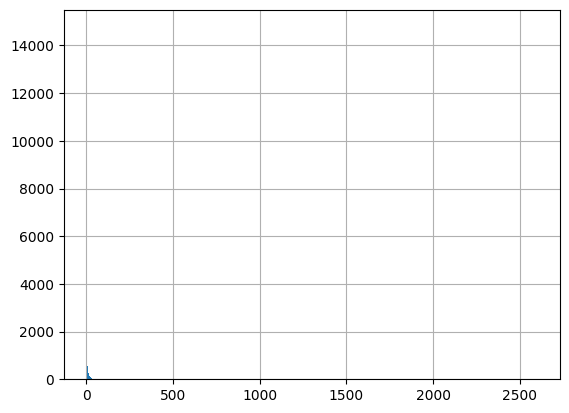

In [30]:
data['time'].hist(bins=1000)

In [31]:
data[['size']].describe()

,size
count,19758.000000
mean,92.096518
std,301.255508
min,1.000000
25%,18.000000
50%,100.000000
75%,100.000000
max,29700.000000


In [32]:
def get_as_selection(action_net, size_thresh_set, ex_time):
    
    ex_data = data.copy()
    if ex is not None:
        ex_data = ex_data[~numpy.isin(ex_data['time'].values, ex_time)]
        
    # all actions all sizes
    
    sub_data = ex_data.copy()
    time_diffs = sub_data[['time']].iloc[1:]
    time_diffs = make_pp(time_diffs, 'time')
    scale = 1
    time_diffs['gg'] = time_diffs['nn'].apply(func=calc_exp, args=(scale,))
    tt = list(range(time_diffs.shape[0]))

    items_dist = numpy.array(range(sub_data.shape[0])) / sub_data.shape[0]
    size_dist = sub_data['size'].cumsum() / sub_data['size'].sum()
    xx = list(range(sub_data.shape[0]))
    time_ax = (sub_data['time'] - sub_data['time'].min()) / (sub_data['time'] - sub_data['time'].min()).max()
    
    result_all_actions_all_sizes = {'xx': time_diffs['time'].values, 'yy': time_diffs['gg'].values}
    
    # specific actions all sizes
    
    result_spec_actions_all_sizes = {}
    for action in action_net:
        sub_data = ex_data.copy()
        
        sub_data = sub_data[sub_data['action'] == action]
        
        time_diffs = sub_data[['time']].iloc[1:]
        time_diffs = make_pp(time_diffs, 'time')
        scale = 1
        time_diffs['gg'] = time_diffs['nn'].apply(func=calc_exp, args=(scale,))
        tt = list(range(time_diffs.shape[0]))

        items_dist = numpy.array(range(sub_data.shape[0])) / sub_data.shape[0]
        size_dist = sub_data['size'].cumsum() / sub_data['size'].sum()
        xx = list(range(sub_data.shape[0]))
        time_ax = (sub_data['time'] - sub_data['time'].min()) / (sub_data['time'] - sub_data['time'].min()).max()

        result_spec_actions_all_sizes[action] = {'xx': time_diffs['time'].values, 'yy': time_diffs['gg'].values}

    # all actions specific size
    
    result_all_actions_specific_size = {}
    for j in range(len(size_thresh_set) - 1):
        sub_data = ex_data.copy()
        
        sub_data = sub_data[(sub_data['size'] >= size_thresh_set[j]) & (sub_data['size'] < size_thresh_set[j+1])]
        
        time_diffs = sub_data[['time']].iloc[1:]
        time_diffs = make_pp(time_diffs, 'time')
        scale = 1
        time_diffs['gg'] = time_diffs['nn'].apply(func=calc_exp, args=(scale,))
        tt = list(range(time_diffs.shape[0]))

        items_dist = numpy.array(range(sub_data.shape[0])) / sub_data.shape[0]
        size_dist = sub_data['size'].cumsum() / sub_data['size'].sum()
        xx = list(range(sub_data.shape[0]))
        time_ax = (sub_data['time'] - sub_data['time'].min()) / (sub_data['time'] - sub_data['time'].min()).max()

        result_all_actions_specific_size[j] = {'xx': time_diffs['time'].values, 'yy': time_diffs['gg'].values}
    
    # speicific actions specific size
    
    result_specall = {}
    for action in action_net:
        sub_data = ex_data.copy()
        
        sub_data = sub_data[data['action'] == action]
        
        result_specall[action] = {}
        for j in range(len(size_thresh_set) - 1):
            subspec_data = sub_data.copy()
            
            subspec_data = subspec_data[(subspec_data['size'] >= size_thresh_set[j]) & (subspec_data['size'] < size_thresh_set[j+1])]
        
            time_diffs = subspec_data[['time']].iloc[1:]
            time_diffs = make_pp(time_diffs, 'time')
            scale = 1
            time_diffs['gg'] = time_diffs['nn'].apply(func=calc_exp, args=(scale,))
            tt = list(range(time_diffs.shape[0]))

            items_dist = numpy.array(range(subspec_data.shape[0])) / subspec_data.shape[0]
            size_dist = subspec_data['size'].cumsum() / subspec_data['size'].sum()
            xx = list(range(subspec_data.shape[0]))
            time_ax = (subspec_data['time'] - subspec_data['time'].min()) / (subspec_data['time'] - subspec_data['time'].min()).max()

            result_specall[action][j] = {'xx': time_diffs['time'].values, 'yy': time_diffs['gg'].values}
        
    return result_all_actions_all_sizes, result_spec_actions_all_sizes, result_all_actions_specific_size, result_specall

In [33]:
action_net = [2, 3, 4, 5]
ex = []
size_thresh_set = [-numpy.inf, 10, 100, numpy.inf]
xaya, xsya, xays, xsyx = get_as_selection(action_net, size_thresh_set, ex)


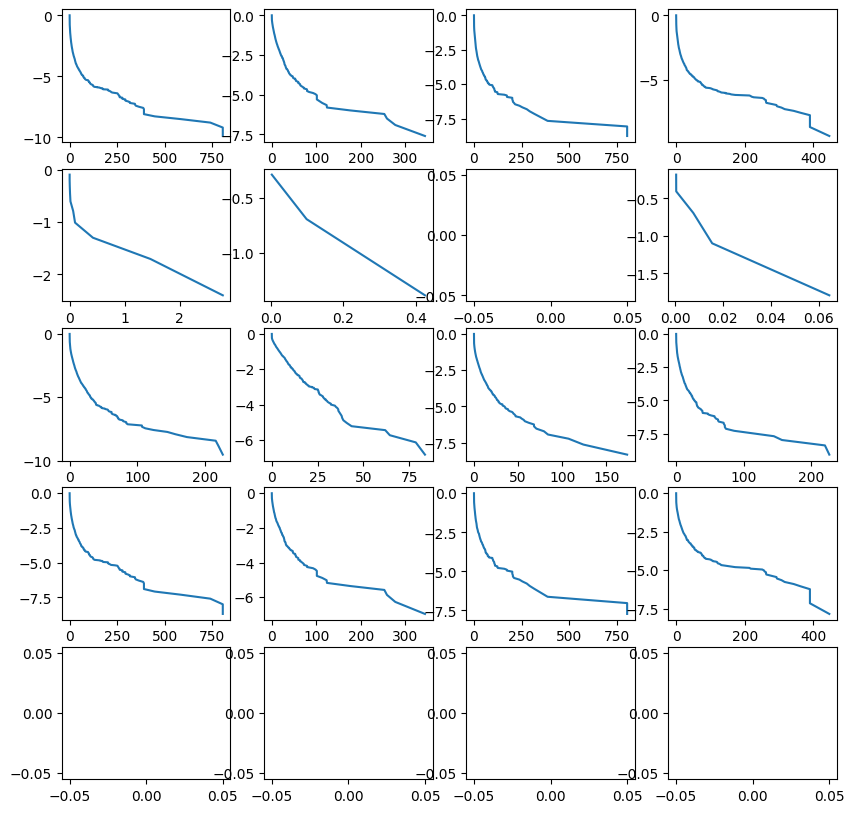

In [34]:
fig, ax = pyplot.subplots(len(action_net)+1, len(size_thresh_set), figsize=(10, 10))
ax[0, 0].plot(xaya['xx'], xaya['yy'])
for i in range(len(action_net)):
    sx = xsya[action_net[i]]
    ax[i+1, 0].plot(sx['xx'], sx['yy'])
for j in range(len(size_thresh_set)-1):
    sy = xays[j]
    ax[0, j+1].plot(sy['xx'], sy['yy'])
for i in range(len(action_net)):
    for j in range(len(size_thresh_set)-1):
        sa = xsyx[action_net[i]][j]
        ax[i+1, j+1].plot(sa['xx'], sa['yy'])

In [35]:
def build_diffs(frame, drop_zeros=False):
    time_diffs = frame[['time']].iloc[1:]
    if drop_zeros:
        time_diffs = time_diffs[time_diffs['time'] > 0]
    time_diffs = make_pp(time_diffs, 'time')
    scale = 1
    time_diffs['gg'] = time_diffs['nn'].apply(func=calc_exp, args=(scale,))

    return {'xx': time_diffs['time'].values, 'yy': time_diffs['gg'].values}

In [36]:
# selection = data[(data['action'] == 1) & (data['size'] < 10)]
selection = data[(data['action'] == 4)]

diffs = build_diffs(frame=selection)

In [37]:
from scipy import stats

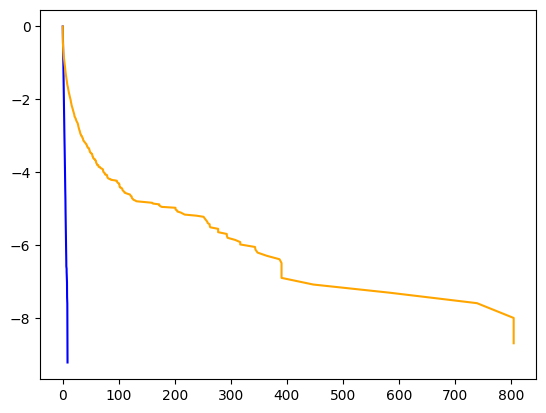

In [38]:
scale = 1
test = pandas.DataFrame(data={'xx': numpy.random.exponential(scale=scale, size=(10000,))})
test = make_pp(test, 'xx')
test['yy'] = test['nn'].apply(func=calc_exp, args=(scale,))

pyplot.plot(test['xx'].values, test['yy'].values, 'blue', diffs['xx'], diffs['yy'], 'orange')

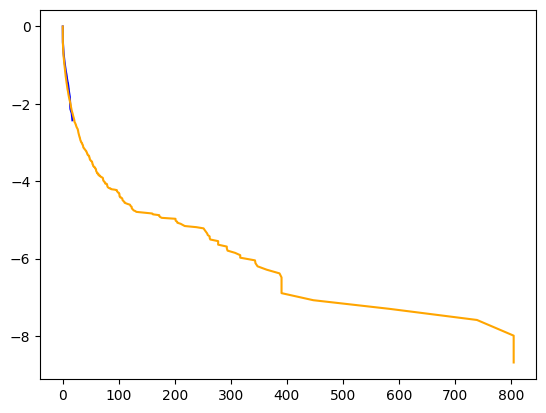

In [55]:
a = 0.1
scale = 3.8
test = pandas.DataFrame(data={'xx': stats.gamma.rvs(a=a, scale=scale, size=(10000,))})
test = make_pp(test, 'xx')
test['yy'] = test['nn'].apply(func=calc_exp, args=(scale,))

pyplot.plot(test['xx'].values, test['yy'].values, 'blue', diffs['xx'], diffs['yy'], 'orange')

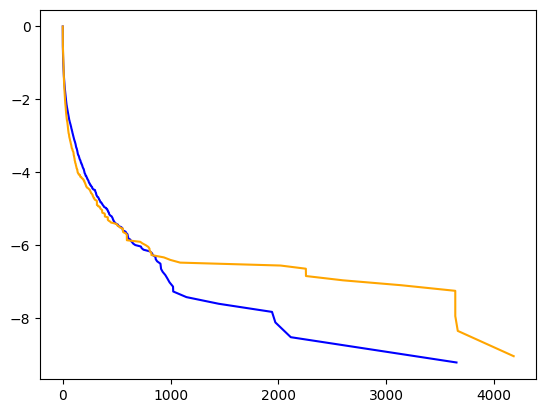

In [55]:
a = 1.5
c = 0.3
scale = 1
test = pandas.DataFrame(data={'xx': stats.gengamma.rvs(a=a, c=c, scale=scale, size=(10000,))})
test = make_pp(test, 'xx')
test['yy'] = test['nn'].apply(func=calc_exp, args=(scale,))

pyplot.plot(test['xx'].values, test['yy'].values, 'blue', diffs['xx'], diffs['yy'], 'orange')

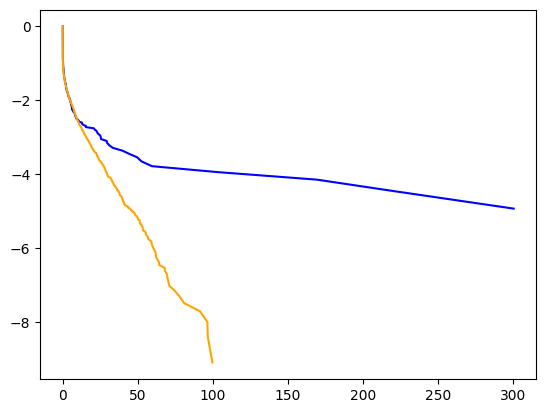

In [493]:
a = 0.4
c = 0.3
scale = 1.4
test = pandas.DataFrame(data={'xx': stats.gengamma.rvs(a=a, c=c, scale=scale, size=(1000,))})
test = make_pp(test, 'xx')
test['yy'] = test['nn'].apply(func=calc_exp, args=(scale,))

pyplot.plot(test['xx'].values, test['yy'].values, 'blue', diffs['xx'], diffs['yy'], 'orange')

In [486]:
stats.gengamma.fit(diffs['xx'], 0.4, 0.3, loc=0, scale=1)

(0.4008780629689852,
 0.3200821845067058,
 -1.6289675777559528e-34,
 0.9643334820014512)

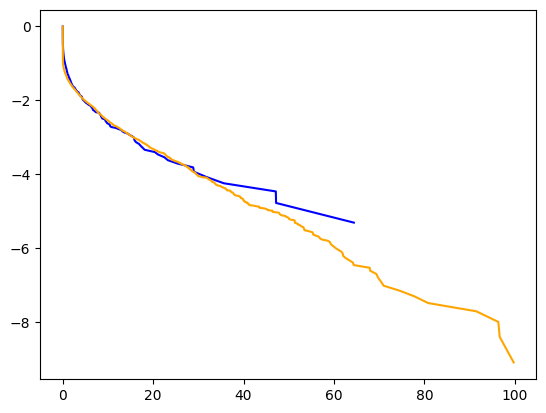

In [506]:
a = 0.55
c = 0.4
scale = 1.3
test = pandas.DataFrame(data={'xx': stats.gengamma.rvs(a=a, c=c, scale=scale, size=(1000,))})
test = make_pp(test, 'xx')
test['yy'] = test['nn'].apply(func=calc_exp, args=(scale,))

pyplot.plot(test['xx'].values, test['yy'].values, 'blue', diffs['xx'], diffs['yy'], 'orange')

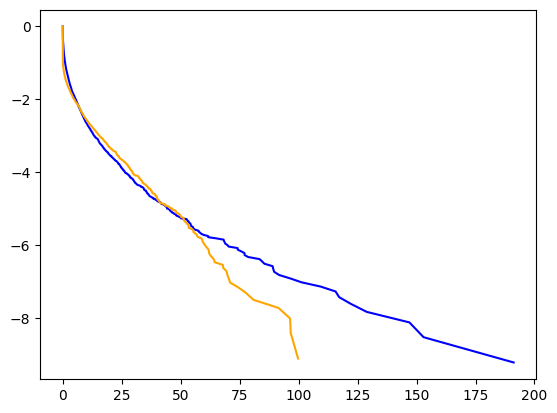

In [433]:
a = 0.42
scale = 1
test = pandas.DataFrame(data={'xx': scale * numpy.random.weibull(a=a, size=(10000,))})
test = make_pp(test, 'xx')
test['yy'] = test['nn'].apply(func=calc_exp, args=(scale,))

pyplot.plot(test['xx'].values, test['yy'].values, 'blue', diffs['xx'], diffs['yy'], 'orange')

In [76]:
def get_dist(action,):

    ex_time = [34200.18960767, 34200.779744711]
    sub_data = data[(data['action'] == action) & ~numpy.isin(data['time'].values, ex_time)]
    time_diffs = sub_data[['time']].diff().iloc[1:]
    time_diffs = make_pp(time_diffs, 'time')
    scale = 1
    time_diffs['gg'] = time_diffs['nn'].apply(func=calc_exp, args=(scale,))
    tt = list(range(time_diffs.shape[0]))

    items_dist = numpy.array(range(sub_data.shape[0])) / sub_data.shape[0]
    size_dist = sub_data['size'].cumsum() / sub_data['size'].sum()
    xx = list(range(sub_data.shape[0]))
    time_ax = (sub_data['time'] - sub_data['time'].min()) / (sub_data['time'] - sub_data['time'].min()).max()
    
    return {'xx': time_diffs['time'].values, 'yy': time_diffs['gg'].values}



In [77]:
def plot_vs_exp(sel, scale, n=None):
    if n is None:
        n = sel['xx'].shape[0]
    test = pandas.DataFrame(data={'xx': numpy.random.exponential(scale=scale, size=(n,))})
    test = make_pp(test, 'xx')
    test['yy'] = test['nn'].apply(func=calc_exp, args=(scale,))
    
    pyplot.plot(test['xx'].values, test['yy'].values, 'blue', sub_data['xx'], sub_data['yy'], 'orange')

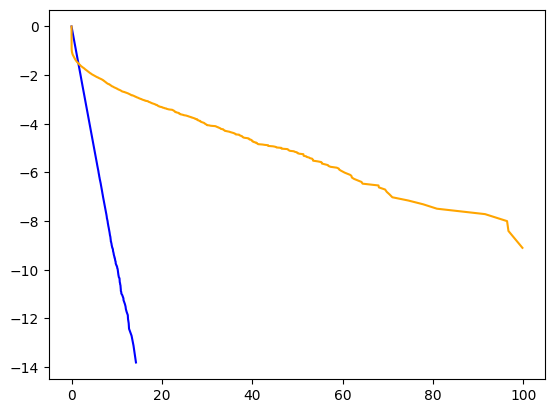

In [151]:
selected = get_dist(action=4)
plot_vs_exp(selected, scale=1, n=1000000)

In [19]:
sub_data = data.copy()
time_diffs = sub_data[['time']].diff().iloc[1:]
time_diffs = make_pp(time_diffs, 'time')
scale = 1
time_diffs['gg'] = time_diffs['nn'].apply(func=calc_exp, args=(scale,))
tt = list(range(time_diffs.shape[0]))

items_dist = numpy.array(range(sub_data.shape[0])) / sub_data.shape[0]
size_dist = sub_data['size'].cumsum() / sub_data['size'].sum()
xx = list(range(sub_data.shape[0]))
min_time = sub_data['time'].min()
max_cond_time = (sub_data['time'] - min_time).max()
time_ax = (sub_data['time'] - min_time) / max_cond_time

result_all_actions_whole_time = {'xx': time_diffs['time'].values, 'yy': time_diffs['gg'].values}

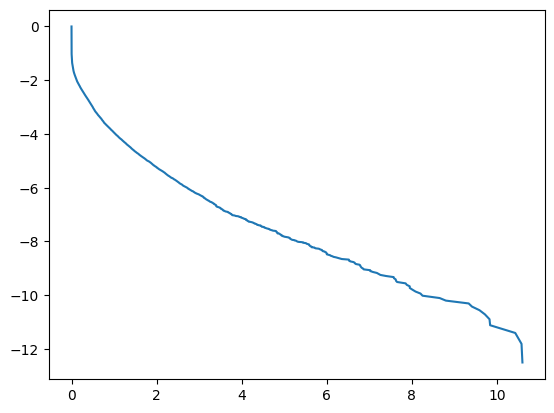

In [20]:
pyplot.plot(time_diffs['time'].values, time_diffs['gg'].values)

In [109]:
value = 0.5
value * max_cond_time + min_time

45899.9884096335

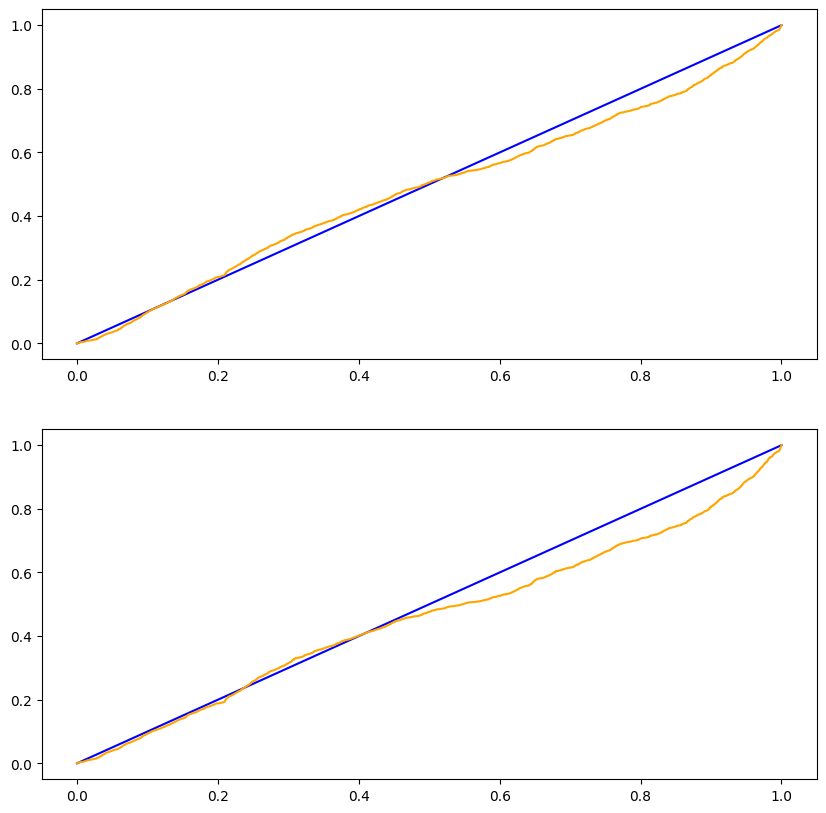

In [108]:
fig, ax = pyplot.subplots(2, 1, figsize=(10, 10))
ax[0].plot(time_ax, time_ax, 'blue', time_ax, items_dist, 'orange')
ax[1].plot(time_ax, time_ax, 'blue', time_ax, size_dist, 'orange')

In [ ]:
fig, ax = pyplot.subplots(2, 1, figsize=(10, 10))
ax[0].plot(time_ax, time_ax, 'blue', time_ax, items_dist, 'orange')
ax[1].plot(time_ax, time_ax, 'blue', time_ax, size_dist, 'orange')

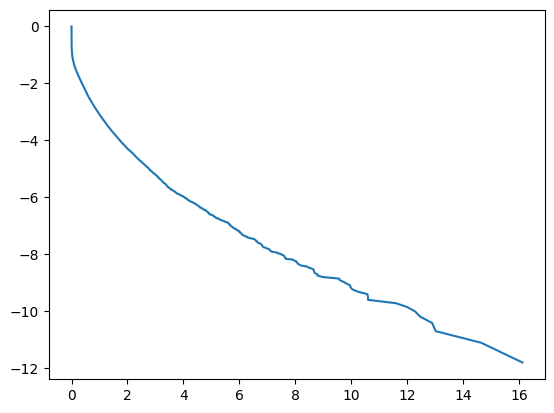

In [40]:
pyplot.plot(time_diffs['time'].values, time_diffs['gg'].values)

In [27]:
sub_data['time'].value_counts().index

Index([ 34200.18960767, 34200.779744711, 50841.095143086, 50842.055541986,
       50842.054813486,  50842.05361109, 50842.052677122, 50842.052632644,
       50842.052164663, 50842.051678929,
       ...
       41195.906823368, 41195.906727651, 41195.906631989, 41195.900286189,
       41195.900144686, 41195.899675747, 41195.899640149,  41195.89948106,
       41195.754757189, 57599.958244616],
      dtype='float64', name='time', length=131919)

In [3]:
# DIRECTION

In [4]:
# TIME

In [5]:
# COMBINED

In [ ]:
# SIZE